# Part II - (Ford go bike trip data visualization)
## by (Wejdan Mangl)

## Investigation Overview


> The goal of the presentation is to explore and deliver key insights and findings about the FordGoBike trip dataset. I was interested to visualize the bike member's characteristics and link them with the bike trip durations. 

>The key findings from the exploration are, most of the bike trips are less than one hour, the majority of members are Subscribers, Male, age 30 and above, and not enrolled in the Share Program. The majority of females are younger than the Male, and the Older members have less trip duration.

## Dataset Overview

> I've selected one of the provided datasets the bike trip data. The dataset is about the FordGoBike system and the rides in San Francisco Bay area. The data consist of 183412 rows and 16 columns.

In [49]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [50]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [51]:
#replace null with the most common
df['member_gender'].fillna(value='Male', inplace=True)

In [52]:
#replace null with the most common
df['member_birth_year'].fillna(value=1988.0, inplace=True)

In [53]:
#drop the remaining null values
df = df.dropna(axis = 0)

In [54]:
#convert gender from object to category
df['member_gender']= df['member_gender'].astype('category')

In [55]:
#convert bike_share_for_all_trip from object to category
df['bike_share_for_all_trip']= df['bike_share_for_all_trip'].astype('category')

In [56]:
#convert user_type from object to category
df['user_type']= df['user_type'].astype('category')

In [57]:
#convert year of birth from float to int
df['member_birth_year'] = df['member_birth_year'].astype(int)

In [58]:
df['duration_min'] = df['duration_sec'] // 60

In [59]:
from datetime import date
 
def age(yearofbirth):
    today = date.today()
    age = today.year - yearofbirth 
    return age

In [60]:
df['age'] = age(df['member_birth_year'] )

In [61]:
Q1 = 30.000000
Q3 = 41.000000
IQR= Q3 - Q1
upper_limit = Q3 + (1.5 * IQR)
lower_limit = Q1 - (1.5 * IQR)

In [62]:
df = df.loc[(df['age'] > lower_limit) & (df['age'] < upper_limit)]

## (Visualization 1)

> Trip distribution in minutes is showing us that most of the trips lasted for less than an hour.

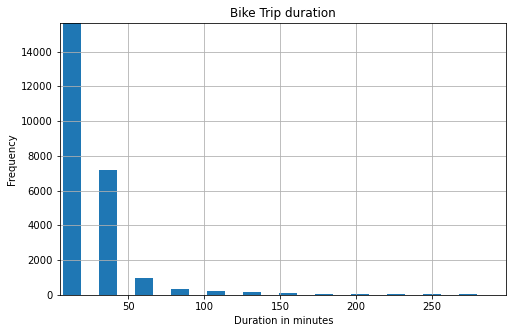

In [63]:
# The distribution of trip duration (in minutes)
plt.figure(figsize = (8,5))
df['duration_min'].hist(bins=60, rwidth=0.5)
plt.xlim(5, 299)
plt.ylim(0,15643)
plt.xlabel('Duration in minutes')
plt.ylabel('Frequency')
plt.title("Bike Trip duration")
plt.show()

## (Visualization 2)

> Most of the trips last for less than an hour. Younger members have the longest trips, especially those of 21. The below chart visualizes the trip duration in minutes distributed by the member's age.


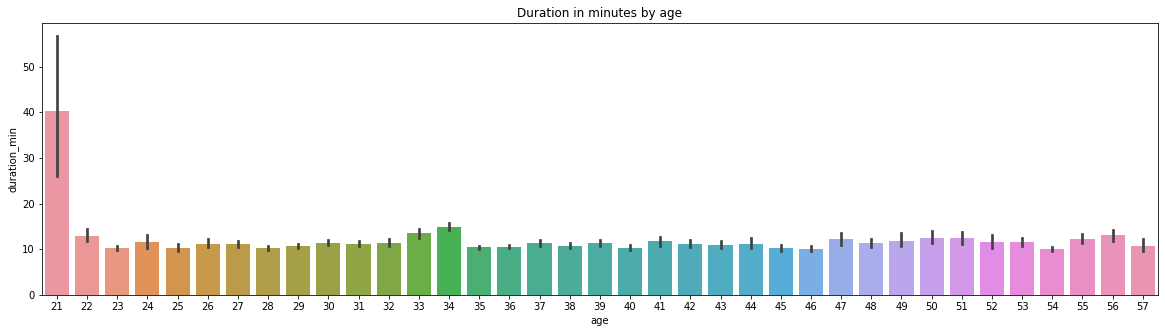

In [64]:
#The relationship between (Duration and Age) 

plt.figure(figsize = (20,5))

sb.barplot(data = df, x = "age", y = "duration_min")
plt.title("Duration in minutes by age");

## (Visualization 3)

> The majority of the members are male subscribers, and not enrolled in the bike share. The below chart is subplots that count the trips over the age by the categories the gender, bike share, and user type.

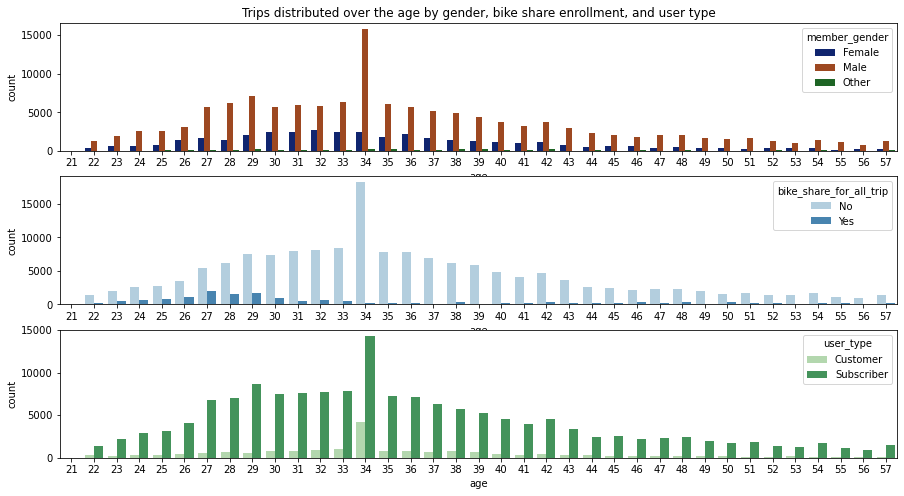

In [65]:
plt.figure(figsize = [15, 8])

# subplot 1: Age and Gender
plt.subplot(3, 1, 1)
sb.countplot(data = df, x = 'age', hue = 'member_gender', palette = 'dark').set(title='Trips distributed over the age by gender, bike share enrollment, and user type')

# subplot 2: Age and Bike Share
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df, x = 'age', hue = 'bike_share_for_all_trip', palette = 'Blues')

# subplot 3: Age and User Type
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df, x = 'age', hue = 'user_type', palette = 'Greens')

plt.show()

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt